#  __UFC Fights__ &copy;

El dataset que vamos a analizar contiene información relativa a las peleas de **UFC** (Ultimate Fighting Championship) desde 2013. Contiene información muy precisa sobre distintos aspectos de este deporte, a través de los cuales vamos a intentar sacar algunas conclusiones.

## 1.- Introducción:

Mediante el siguiente dataset, pretendemos realizar un estudio mediante la comparación de diferentes variables, con el fin de determinar si existe cierta relación éstas. Será interesante poder realizar ciertras predcciones a cerca de que luchador ganaría atendiendo a ciertos parámetros.

### 1.1. Apertura y visualización del dataset

Como es costumbre, procedemos a cargar la librería que vamos a necesita para llevar a cabo la visualización y limpieza de nuestro dataset, en este caso, ___pandas___.

Una vz importada la librería, abrimos nuestro dataset de la siguiente forma: ___ufc = pd.read_csv('dat/dataufc.csv', index_col=False)___. Al fichero resultante le vamos a denominar ___ufc___.

In [1]:
import pandas as pd
ufc = pd.read_csv('dat/dataufc.csv', index_col=False)

ufc

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue


#### _Explorando el dataset_

El dataset en cuestión cuenta con un total de 895 columnas y 1477 filas. Mucha de esta información es poco relevante para nuestro análisis, por lo que vamos a seleccionar aquella que pueda aportar más valor.

Antes de empezar a trabajar, es necesario visualizar nuestra tabla con el fin de conocer el nombre de nuestras columnas y así escoger las que sean de mayor interees para nuestro análisis. Debido a la enorme cantidad de columnas que tenemos, no es posible examinar todas ellas con el comando ___head.()___.

Por tanto, procedemos a mostrarlos en formato lista mediante el comando ___cols = ufc.columns.tolist ()___, de esta forma podemos obsrvar y elegir que columnas son de nuestro interés.

In [2]:
cols = ufc.columns.tolist ()
cols

['BPrev',
 'BStreak',
 'B_Age',
 'B_Height',
 'B_HomeTown',
 'B_ID',
 'B_Location',
 'B_Name',
 'B_Weight',
 'B__Round1_Grappling_Reversals_Landed',
 'B__Round1_Grappling_Standups_Landed',
 'B__Round1_Grappling_Submissions_Attempts',
 'B__Round1_Grappling_Takedowns_Attempts',
 'B__Round1_Grappling_Takedowns_Landed',
 'B__Round1_Strikes_Body Significant Strikes_Attempts',
 'B__Round1_Strikes_Body Significant Strikes_Landed',
 'B__Round1_Strikes_Body Total Strikes_Attempts',
 'B__Round1_Strikes_Body Total Strikes_Landed',
 'B__Round1_Strikes_Clinch Body Strikes_Attempts',
 'B__Round1_Strikes_Clinch Body Strikes_Landed',
 'B__Round1_Strikes_Clinch Head Strikes_Attempts',
 'B__Round1_Strikes_Clinch Head Strikes_Landed',
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts',
 'B__Round1_Strikes_Clinch Leg Strikes_Landed',
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts',
 'B__Round1_Strikes_Clinch Significant Kicks_Landed',
 'B__Round1_Strikes_Clinch Significant Punches_Attempts',
 'B__Rou

Observando el nombre de las columnas, en función del color del luchador, seleccionamos aquellas que nos parezcan más relevantes para nuestro análisis:

- `Fight_ID`: Identificador de la pelea.
- `Date`: Fecha de la pelea.
- `Location`: Ubicación de la pelea del luchador.
- `HomeTown`: Ciudad natal del luchador.
- `Age`: Edad del luchador.
- `Height`: Altura del luchador.
- `Weigh`: Peso del luchador.
- `Prev`: Peleas anteriores del luchador.
- `winner`: ¿Quién fue el ganador de la pelea?
- `winby`: ¿Cómo ganó la pelea el luchador? 
- `Max_round`: Número de rondas del combate.
- `Streak`: Racha de victorias del luchador.
- `Clinch Head Strikes_Landed`: Número de golpes en combate cercano en la cabeza asestados por un luchador.
- `Clinch Body Strikes_Landed`: Número de golpes en combate cercano en el cuerpo asestados por un luchador.
- `Distance Head Strikes_Landed`: Número de golpes en combate lejano en la cabeza asestados por un luchador.
- `Distance Body Strikes_Landed`: Número de golpes en combate lejano en el cuerpo asestados por un luchador.

### ___1.2.- Selección de variables___

Una vez localizadas las columnas sobre las que vamos a trabajar, procedemos a creas una nueva tabla con el nombre ___ufc2___, mediante el código ___ufc2 = ufc[["Columnas relevantes]]___,en la que se incluyan sólamente estas variables, ya que el resto no son de importancia para nuestro estudio.


In [3]:
ufc2 = ufc[['Fight_ID', 'Date', 'winner', 'winby', 'Max_round', 
           'BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_Location', 'B_HomeTown',
           'B__Round1_Strikes_Clinch Body Strikes_Landed','B__Round1_Strikes_Clinch Head Strikes_Landed',
           'B__Round1_Strikes_Distance Body Strikes_Landed', 'B__Round1_Strikes_Distance Head Strikes_Landed',
           'B__Round2_Strikes_Clinch Body Strikes_Landed','B__Round2_Strikes_Clinch Head Strikes_Landed',
           'B__Round2_Strikes_Distance Body Strikes_Landed', 'B__Round2_Strikes_Distance Head Strikes_Landed',
           'B__Round3_Strikes_Clinch Body Strikes_Landed','B__Round3_Strikes_Clinch Head Strikes_Landed',
           'B__Round3_Strikes_Distance Body Strikes_Landed', 'B__Round3_Strikes_Distance Head Strikes_Landed',
           'B__Round4_Strikes_Clinch Body Strikes_Landed','B__Round4_Strikes_Clinch Head Strikes_Landed',
           'B__Round4_Strikes_Distance Body Strikes_Landed', 'B__Round4_Strikes_Distance Head Strikes_Landed',
           'B__Round5_Strikes_Clinch Body Strikes_Landed','B__Round5_Strikes_Clinch Head Strikes_Landed',
           'B__Round5_Strikes_Distance Body Strikes_Landed', 'B__Round5_Strikes_Distance Head Strikes_Landed',
           'RPrev', 'RStreak', 'R_Age','R_Height', 'R_Location', 'R_HomeTown',
           'R__Round1_Strikes_Clinch Body Strikes_Landed','R__Round1_Strikes_Clinch Head Strikes_Landed',
           'R__Round1_Strikes_Distance Body Strikes_Landed', 'R__Round1_Strikes_Distance Head Strikes_Landed',
           'R__Round2_Strikes_Clinch Body Strikes_Landed','R__Round2_Strikes_Clinch Head Strikes_Landed',
           'R__Round2_Strikes_Distance Body Strikes_Landed', 'R__Round2_Strikes_Distance Head Strikes_Landed',
           'R__Round3_Strikes_Clinch Body Strikes_Landed','R__Round3_Strikes_Clinch Head Strikes_Landed',
           'R__Round3_Strikes_Distance Body Strikes_Landed', 'R__Round3_Strikes_Distance Head Strikes_Landed',
           'R__Round4_Strikes_Clinch Body Strikes_Landed','R__Round4_Strikes_Clinch Head Strikes_Landed',
           'R__Round4_Strikes_Distance Body Strikes_Landed', 'R__Round4_Strikes_Distance Head Strikes_Landed',
           'R__Round5_Strikes_Clinch Body Strikes_Landed','R__Round5_Strikes_Clinch Head Strikes_Landed',
           'R__Round5_Strikes_Distance Body Strikes_Landed', 'R__Round5_Strikes_Distance Head Strikes_Landed'
          ]]

### ___1.2.- Limpieza de datos___

Hasta este momento, lo único que hemos realizado es abrir nuestro csv con el nombre de ___ufc___, el cual contenía todas las  columnas o variables con interés de estudio y posteriormente, hemos creado una nueva tabla llamada ___ufc2___ en la que únicamente 

In [4]:

#Cambiamos el nombre de LAS columnas, para que todas sigan un formato parecido y sea más fácil su manejo
ufc2.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round', 
                'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
                'b_round1_strikes_clinch_body','b_round1_strikes_clinch_head',
                'b_round1_strikes_distance_body', 'b_round1_strikes_distance_head',
                'b_round2_strikes_clinch_body','b_round2_strikes_clinch_head',
                'b_round2_strikes_distance_body', 'b_round2_strikes_distance_head',
                'b_round3_strikes_clinch_body','b_round3_strikes_clinch_head',
                'b_round3_strikes_distance_body', 'b_round3_strikes_distance_head',
                'b_round4_strikes_clinch_body','b_round4_strikes_clinch_head',
                'b_round4_strikes_distance_body', 'b_round4_strikes_distance_head',
                'b_round5_strikes_clinch_body','b_round5_strikes_clinch_head',
                'b_round5_strikes_distance_body', 'b_round5_strikes_distance_head',
                'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
                'r_round1_strikes_clinch_body','r_round1_strikes_clinch_head',
                'r_round1_strikes_distance_body', 'r_round1_strikes_distance_head',
                'r_round2_strikes_clinch_body','r_round2_strikes_clinch_head',
                'r_round2_strikes_distance_body', 'r_round2_strikes_distance_head',
                'r_round3_strikes_clinch_body','r_round3_strikes_clinch_head',
                'r_round3_strikes_distance_body', 'r_round3_strikes_distance_head',
                'r_round4_strikes_clinch_body','r_round4_strikes_clinch_head',
                'r_round4_strikes_distance_body', 'r_round4_strikes_distance_head',
                'r_round5_strikes_clinch_body','r_round5_strikes_clinch_head',
                'r_round5_strikes_distance_body', 'r_round5_strikes_distance_head'
           ]
ufc2.head()

,fight_id,date,winner,winby,max_round,b_prev,b_streak,b_age,b_height,b_location,...,r_round3_strikes_distance_body,r_round3_strikes_distance_head,r_round4_strikes_clinch_body,r_round4_strikes_clinch_head,r_round4_strikes_distance_body,r_round4_strikes_distance_head,r_round5_strikes_clinch_body,r_round5_strikes_clinch_head,r_round5_strikes_distance_body,r_round5_strikes_distance_head
0,6405,01/02/2017,red,DEC,3,1,1,23.0,182.0,Mezzocorona Italy,...,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4786,06/30/2014,blue,SUB,3,0,0,32.0,175.0,"Pharr, Texas USA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5523,07/27/2015,red,KO/TKO,3,2,0,38.0,172.0,Tokyo Japan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6240,10/03/2016,blue,SUB,3,0,0,23.0,170.0,Tijuana Mexico,...,1.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6226,08/22/2016,red,DEC,3,3,1,30.0,167.0,"Spokane, WA USA",...,5.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Es importante saber si existen valores nulos en el dataset
ufc2.isnull().any()

fight_id                          False
date                              False
winner                            False
winby                              True
max_round                         False
b_prev                            False
b_streak                          False
b_age                              True
b_height                           True
b_location                         True
b_hometown                         True
b_round1_strikes_clinch_body       True
b_round1_strikes_clinch_head       True
b_round1_strikes_distance_body     True
b_round1_strikes_distance_head     True
b_round2_strikes_clinch_body       True
b_round2_strikes_clinch_head       True
b_round2_strikes_distance_body     True
b_round2_strikes_distance_head     True
b_round3_strikes_clinch_body       True
b_round3_strikes_clinch_head       True
b_round3_strikes_distance_body     True
b_round3_strikes_distance_head     True
b_round4_strikes_clinch_body       True
b_round4_strikes_clinch_head       True


Uno de los problemas de este dataset es la presencia de campos vacios (NaN) dentro de columnas importantes como la edad o el peso del jugador. Es preciso solucionar este problema antes de comenzar el análisis del dataset.
Para solucionar este problema, tenemos varias opciones:
- Eliminar las filas con valores nulos
- Reemplazar los valores nulos por cero
- Sustituir los nulos por la media o la mediana
La solución correcta dependerá del tipo de datos con el que tratemos. En nuestro caso:
- Eliminaremos las filas con valores nulos en datos cualitativos
- Reemplazaremos por cero los valores nulos relativos a las rondas. Un valor nulo (cero) en estas columnas implica que el jugador no ha pasado de ronda.
- Sustituiremos por la media los valores nulos en el resto de columnas de tipo cuantitativo.


In [6]:
#Reemplazamos los valores nulos por la media de cada columna
import numpy as np

ufc2.b_age = ufc2.b_age.fillna(np.mean(ufc2.b_age))
ufc2.b_height = ufc2.b_height.fillna(np.mean(ufc2.b_height))
ufc2.r_age = ufc2.r_age.fillna(np.mean(ufc2.r_age))


#Eliminamos aquellas filas con valores cualitativos nulos
ufc2= ufc2.dropna(subset=['winby', 'b_location', 'b_hometown', 'r_location'], how='any')

# Ahora sustituimos los valores nulos de las columnas restantes por "0"
ufc2 = ufc2.fillna(0)

ufc2.isnull().any()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


fight_id                          False
date                              False
winner                            False
winby                             False
max_round                         False
b_prev                            False
b_streak                          False
b_age                             False
b_height                          False
b_location                        False
b_hometown                        False
b_round1_strikes_clinch_body      False
b_round1_strikes_clinch_head      False
b_round1_strikes_distance_body    False
b_round1_strikes_distance_head    False
b_round2_strikes_clinch_body      False
b_round2_strikes_clinch_head      False
b_round2_strikes_distance_body    False
b_round2_strikes_distance_head    False
b_round3_strikes_clinch_body      False
b_round3_strikes_clinch_head      False
b_round3_strikes_distance_body    False
b_round3_strikes_distance_head    False
b_round4_strikes_clinch_body      False
b_round4_strikes_clinch_head      False


Ya tenemos todos los campos completos, pero antes de empezar a analizar la tabla a fondo, es necesario ver si el formato de las columnas es el correcto.

In [7]:
ufc2.dtypes

fight_id                            int64
date                               object
winner                             object
winby                              object
max_round                           int64
b_prev                              int64
b_streak                            int64
b_age                             float64
b_height                          float64
b_location                         object
b_hometown                         object
b_round1_strikes_clinch_body      float64
b_round1_strikes_clinch_head      float64
b_round1_strikes_distance_body    float64
b_round1_strikes_distance_head    float64
b_round2_strikes_clinch_body      float64
b_round2_strikes_clinch_head      float64
b_round2_strikes_distance_body    float64
b_round2_strikes_distance_head    float64
b_round3_strikes_clinch_body      float64
b_round3_strikes_clinch_head      float64
b_round3_strikes_distance_body    float64
b_round3_strikes_distance_head    float64
b_round4_strikes_clinch_body      

Hay algunas columnas cuyos formatos no están bien, por lo que debemos limpiarlas para poder trabajar con ellas

In [8]:
#Convertimos las columnas de age y strikes de cada luchardor de float a int:

ufc2.iloc[:, 11:31] =ufc2.iloc[:, 11:31].astype(int)
ufc2.iloc[:, 37:60] =ufc2.iloc[:, 37:60].astype(int)

ufc2.b_age = ufc2.b_age.astype(int)
ufc2.r_age = ufc2.r_age.astype(int)

#Por otro lado, queremos que la información relativa a la altura está en formato float

ufc2.r_height = ufc2.r_height.astype(float)


#Date: debe de estar en formato datetime

import re
from datetime import date, datetime

#parece que hay algunas filas que no siguen el formato de la mayoría ('%m/%d/%Y')
ufc2.date = ufc2.date.apply(
    lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))

#Winby: el formato es correcto, pero podemos simplificar algunos de sus resultados
#KO/TKO significan lo mismo (knockout), así que vamos a simplificarlo a KO.

ufc2.winby = ufc2.winby.replace('KO/TKO', 'KO')

ufc2.dtypes[:60]

fight_id                            int64
date                               object
winner                             object
winby                              object
max_round                           int64
b_prev                              int64
b_streak                            int64
b_age                               int64
b_height                          float64
b_location                         object
b_hometown                         object
b_round1_strikes_clinch_body        int64
b_round1_strikes_clinch_head        int64
b_round1_strikes_distance_body      int64
b_round1_strikes_distance_head      int64
b_round2_strikes_clinch_body        int64
b_round2_strikes_clinch_head        int64
b_round2_strikes_distance_body      int64
b_round2_strikes_distance_head      int64
b_round3_strikes_clinch_body        int64
b_round3_strikes_clinch_head        int64
b_round3_strikes_distance_body      int64
b_round3_strikes_distance_head      int64
b_round4_strikes_clinch_body      

In [9]:
# #Ahora procedemos a realizar la suma de las distintas rondas para obtener el resultado total del combate:

ufc2['b_strikes_clinch_body']= ufc2.iloc[:,[11, 15, 19, 23, 27]].sum(axis=1)

ufc2['b_strikes_clinch_head']= ufc2.iloc[:,[12, 16, 20, 24, 28]].sum(axis=1)

ufc2['b_strikes_distance_body']= ufc2.iloc[:, [13, 17, 21, 25, 29]].sum(axis=1)

ufc2['b_strikes_distance_head']= ufc2.iloc[:, [14, 18, 22, 26, 30]].sum(axis=1)

ufc2['r_strikes_clinch_body']= ufc2.iloc[:,[38, 42, 46, 50, 54]].sum(axis=1)

ufc2['r_strikes_clinch_head']= ufc2.iloc[:,[39, 43, 47, 51, 55]].sum(axis=1)

ufc2['r_strikes_distance_body']= ufc2.iloc[:, [40, 44, 48, 52, 56]].sum(axis=1)

ufc2['r_strikes_distance_head']= ufc2.iloc[:, [41, 45, 49, 53, 57]].sum(axis=1)

#Me quedo con las columnas que me interesan

ufc3 = ufc2[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
             'b_strikes_clinch_body','b_strikes_clinch_head', 'b_strikes_distance_body','b_strikes_distance_head',
             'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
             'r_strikes_clinch_body','r_strikes_clinch_head', 'r_strikes_distance_body','r_strikes_distance_head'
            ]]
    

ufc3.head()

,fight_id,date,winner,winby,max_round,b_prev,b_streak,b_age,b_height,b_location,...,r_prev,r_streak,r_age,r_height,r_location,r_hometown,r_strikes_clinch_body,r_strikes_clinch_head,r_strikes_distance_body,r_strikes_distance_head
0,6405,01/02/2017,red,DEC,3,1,1,23,182.0,Mezzocorona Italy,...,6,1,27,187.0,"Coconut Creek, Florida United States","João Pessoa, Paraíba Brazil",3,18,57,2
1,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA",...,0,0,29,182.0,"Fort Hood, TX USA","Des Moines, IA USA",0,0,0,0
2,5523,07/27/2015,red,KO,3,2,0,38,172.0,Tokyo Japan,...,2,0,32,177.0,"Bridgewater, Massachusetts USA","Brockton, Massachusetts USA",3,2,39,5
3,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,...,6,4,25,175.0,"Kapolei, HI USA","Honolulu, HI USA",9,27,121,16
4,6226,08/22/2016,red,DEC,3,3,1,30,167.0,"Spokane, WA USA",...,5,2,28,170.0,"Colorado Spring, Colorado United States","Colorado Springs, Colorado United States",47,14,92,29


Ahora tenemos una tabla que contiene la información más relevante por batalla. Hemos resumido los datos de `strikes` por tipo de golpes, resumiendo la información de las cinco rondas.
 
Vemos que hay dos tipos de `Winner`: 'blue' y 'red'. En lucha libre, antes de la pelea se sortea que luchador pertenece a cada color. En `ufc2` tenemos información relativa a ambos colores en cada fila, pero solo nos interesa la información del ganador.

Para ello, vamos a crear dos tablas con información exclusiva de cada color, para posteriormente unirlas. De esta forma, tendremos únicamente información del color ganador en cada batalla.

In [10]:
# Creamos una tabla para Blue y le cambiamos el nombre

ufc_blue = ufc3[(ufc3.winner == 'blue')]

ufc_blue = ufc_blue[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
             'b_strikes_clinch_body','b_strikes_clinch_head', 'b_strikes_distance_body','b_strikes_distance_head']]

ufc_blue.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round',
             'prev', 'streak', 'age', 'height', 'location', 'hometown',
             'strikes_clinch_body','strikes_clinch_head', 'strikes_distance_body','strikes_distance_head']

#Hacemos lo mismo con el Rojo

ufc_red = ufc3[(ufc3.winner == 'red')]


ufc_red= ufc_red[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
             'r_strikes_clinch_body','r_strikes_clinch_head', 'r_strikes_distance_body','r_strikes_distance_head']]

ufc_red.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round',
             'prev', 'streak', 'age', 'height', 'location', 'hometown',
             'strikes_clinch_body','strikes_clinch_head', 'strikes_distance_body','strikes_distance_head']

ufc_red

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes_clinch_body,strikes_clinch_head,strikes_distance_body,strikes_distance_head
0,6405,01/02/2017,red,DEC,3,6,1,27,187.0,"Coconut Creek, Florida United States","João Pessoa, Paraíba Brazil",3,18,57,2
2,5523,07/27/2015,red,KO,3,2,0,32,177.0,"Bridgewater, Massachusetts USA","Brockton, Massachusetts USA",3,2,39,5
4,6226,08/22/2016,red,DEC,3,5,2,28,170.0,"Colorado Spring, Colorado United States","Colorado Springs, Colorado United States",47,14,92,29
5,5655,10/26/2015,red,DEC,3,4,0,30,180.0,Bushmills Northern Ireland,Bushmills Northern Ireland,18,10,49,10
6,5914,02/22/2016,red,DEC,3,4,1,30,187.0,"Lee's Summit, Missouri USA","Newport News, Virginia USA",0,23,118,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,4928,07/21/2014,red,SUB,3,0,0,28,177.0,"Tallaght, Dublin Ireland",Dublin Ireland,0,0,0,0
1471,5631,09/07/2015,red,DEC,3,3,3,38,193.0,"Chicago, Illinois USA",Minsk Belarus,23,7,26,1
1472,5123,11/17/2014,red,DEC,3,0,0,27,167.0,"San Jose, California USA",Estado de Mexico Mexico,0,0,0,0
1473,6146,06/20/2016,red,DEC,3,3,0,31,162.0,Dagestan Republic Russia,Dagestan Republic Russia,8,11,42,25


Una vez tengo las dos tablas con información exclusiva de cada color, las uno para tener toda la información comprimida en una misma tabla (`ufc3`)

In [11]:
ufc4 = pd.concat([ufc_blue, ufc_red], axis=0)
ufc4

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes_clinch_body,strikes_clinch_head,strikes_distance_body,strikes_distance_head
1,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA","Careiro da Várzea, Amazonas Brazil",0,0,0,0
3,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,Tijuana Mexico,0,0,0,0
7,5004,09/22/2014,blue,SUB,3,0,0,27,177.0,"Jefferson, Iowa USA","Jefferson, Iowa USA",0,0,0,0
9,5972,03/21/2016,blue,DEC,3,2,1,33,182.0,São Paulo Brazil,"Jales City, Sao Paulo Brazil",16,8,15,36
11,5320,04/13/2015,blue,KO,3,0,0,27,177.0,Fife Scotland,Fife Scotland,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,4928,07/21/2014,red,SUB,3,0,0,28,177.0,"Tallaght, Dublin Ireland",Dublin Ireland,0,0,0,0
1471,5631,09/07/2015,red,DEC,3,3,3,38,193.0,"Chicago, Illinois USA",Minsk Belarus,23,7,26,1
1472,5123,11/17/2014,red,DEC,3,0,0,27,167.0,"San Jose, California USA",Estado de Mexico Mexico,0,0,0,0
1473,6146,06/20/2016,red,DEC,3,3,0,31,162.0,Dagestan Republic Russia,Dagestan Republic Russia,8,11,42,25


# Análisis del dataset

Una vez que hemos manipulado el dataset inicial, podemos proceder a su análisis. Buscamos intentar predecir que variables influyen sobre la victoria del jugador. Para ello vamos a plantearnos una serie de cuestiones que relacionan distintas variables del dataset, y así analizar alguna posible relación.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')

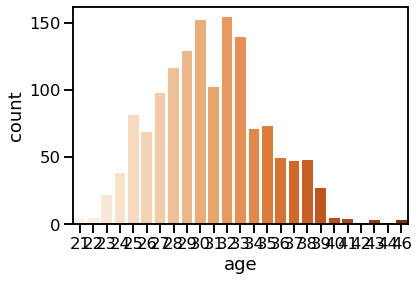

In [13]:
#RELACIÓN ENTRE LOS GANDORES Y SU EDAD

out = sns.countplot (x= 'age', data=ufc4, palette="Oranges")
out

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

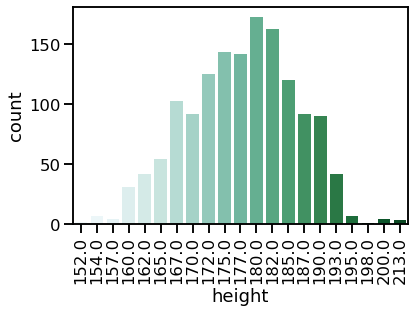

In [14]:
# RELACIÓN GANAR Y LA ALTURA

out = sns.countplot (x= 'height', data=ufc4, palette="BuGn")
out=plt.xticks(rotation=90)
out

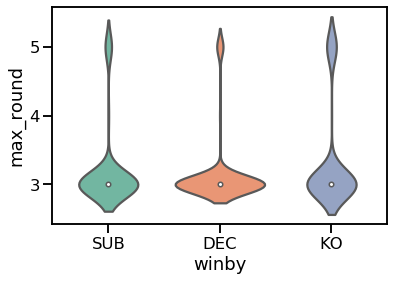

In [15]:
#RELACIÓN ENTRE LA FORMA DE GANAR Y LA RONDA MÁXIMA A LA QUE LLEGAN


out = sns.violinplot(x='winby', y='max_round', data=ufc4, palette= "Set2")

out

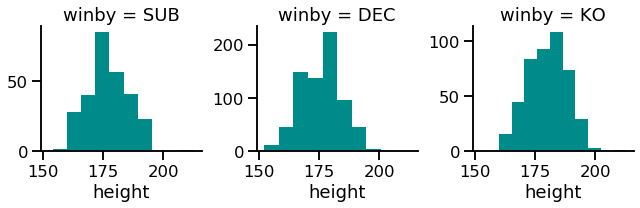

In [16]:
#Procedemos a analizar si existe alguna relacíon entre la altura del luchador y como se llevó a cabo la victoria
out = sns.FacetGrid(ufc4, col="winby", sharey= False) 

out.map(plt.hist, "height", bins=10, color='DarkCyan')

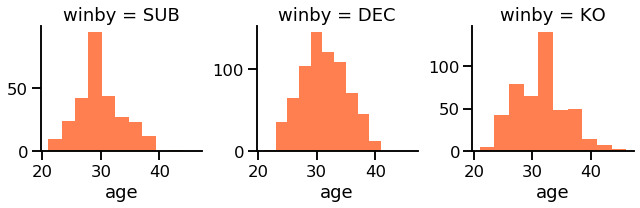

In [17]:
#Procedemos a analizar si existe alguna relacíon entre la edad del luchador y como se llevó a cabo la victoria
out = sns.FacetGrid(ufc4, col="winby", sharey= False) 

out.map(plt.hist, "age", bins=10, color='Coral');

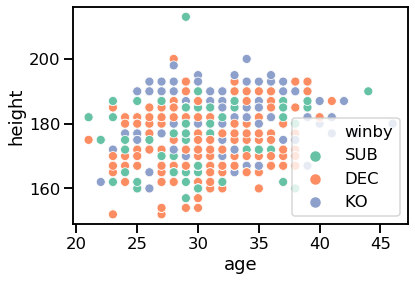

In [18]:
#Procedemos a analizar si existe alguna relacíon entre la altura, edad del luchador y como se llevó a cabo la victoria

out = sns.scatterplot(x='age', y='height', hue='winby', palette="Set2", data=ufc4)
out

In [19]:
ufc4_melt = pd.melt(ufc4, id_vars =['fight_id',
                                    'date',
                                    'winner',
                                    'winby',
                                    'max_round',
                                    'prev',
                                    'streak',
                                    'age',
                                    'height',
                                    'location',
                                    'hometown'],
                    var_name = ["strikes"])

ufc4_melt.head()

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes,value
0,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA","Careiro da Várzea, Amazonas Brazil",strikes_clinch_body,0
1,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,Tijuana Mexico,strikes_clinch_body,0
2,5004,09/22/2014,blue,SUB,3,0,0,27,177.0,"Jefferson, Iowa USA","Jefferson, Iowa USA",strikes_clinch_body,0
3,5972,03/21/2016,blue,DEC,3,2,1,33,182.0,São Paulo Brazil,"Jales City, Sao Paulo Brazil",strikes_clinch_body,16
4,5320,04/13/2015,blue,KO,3,0,0,27,177.0,Fife Scotland,Fife Scotland,strikes_clinch_body,0


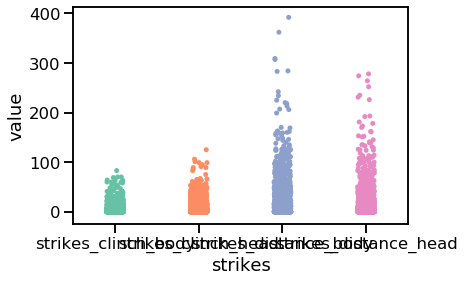

In [20]:
out = sns.stripplot(x='strikes', y='value', data=ufc4_melt, palette = "Set2")
out

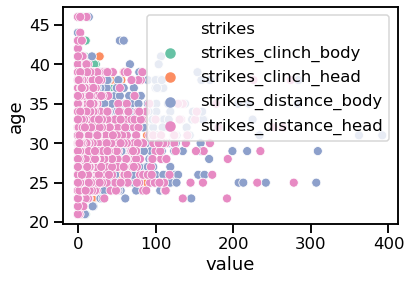

In [21]:
#AQUÍ SE VE EL NÚMERO DE GOLPES POR EDAD. EL COLOR INDICA EL TIPO DE GOLPE

out = sns.scatterplot(x='value', y='age', data=ufc4_melt, hue='strikes', palette = "Set2")
out

INTRODUCIR CIUDADES

In [22]:
# Busqueda de los top 10 lugares junto con su cuenta
top10 = ufc4['hometown'].value_counts()[:10]
top10



Rio de Janeiro Brazil             35
Sao Paulo Brazil                  25
Dublin Ireland                    19
Dagestan Russia                   16
Miami, Florida USA                11
Denver, Colorado United States    11
Milwaukee, Wisconsin USA          11
Oahu, Hawaii USA                  10
Brooklyn, New York USA            10
San Diego, California USA         10
Name: hometown, dtype: int64

Nos interesaría proyectar estas ciudades sobre un **mapa**. Sin embargo, no disponemos de información sobre su ubicación.

Para ello, crearemos un nuevo dataframe que contenga los datos relativos a la `longitud` y `latitud` de las ciudades del `top10`

In [23]:
# Creamos un nuevo dataframe que contiene los datos de longitud y latitud del top 10 ciudades

hometown_data = pd.DataFrame({
   'hometown':['Rio de Janeiro, Brazil', 'Sao Paulo, Brazil', 'Dublin, Ireland', 'Dagestan, Russia', 'Denver, USA', 
           'Miami, USA', 'Milwaukee, USA', 'Brooklyn, USA', 'San Diego, USA', 'Oahu, USA'],
   'latitude':[-22.906847, -23.55052, 53.349804, 42.846581, 39.739235, 
          25.761681, 43.038902, 40.678177, 32.715736, 21.438911],
   'longitude':[-43.172897, -46.633308, -6.26031, 47.633701, -104.99025, 
          -80.191788, -87.906471, -73.94416, -117.161087, -158.000061],
   'value':[35, 25, 19, 16, 11,
            11, 11, 10, 10, 10]
    })

hometown_data

,hometown,latitude,longitude,value
0,"Rio de Janeiro, Brazil",-22.906847,-43.172897,35
1,"Sao Paulo, Brazil",-23.550520,-46.633308,25
2,"Dublin, Ireland",53.349804,-6.260310,19
3,"Dagestan, Russia",42.846581,47.633701,16
4,"Denver, USA",39.739235,-104.990250,11
5,"Miami, USA",25.761681,-80.191788,11
6,"Milwaukee, USA",43.038902,-87.906471,11
7,"Brooklyn, USA",40.678177,-73.944160,10
8,"San Diego, USA",32.715736,-117.161087,10
9,"Oahu, USA",21.438911,-158.000061,10


In [24]:
import folium

# Mi mapa sobre el mundo
map_ht = folium.Map(location=[10.34, -30.00], zoom_start=2.2, tiles= 'cartodbdark_matter')


# Añadir a mi mapa usando CircleMarker
hometown_data.apply(
    lambda row: folium.CircleMarker([row.latitude, row.longitude], tooltip=row.hometown, color="snow", radius=5).add_to(map_ht),
    axis=1)

map_ht

# Conclusiones

# 